# Домашняя работа №1. "Titanic train"

## Импортирование библиотек

In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline 
import matplotlib.pyplot as plt

## Чтение данных из файла .csv

In [9]:
data = pd.read_csv('titanic_train.csv')

In [10]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Ответы на вопросы. 
### Сколько муж и жен находилось на борту и сколько было муж 2-го класса.
#### Для подсчета количества по заданному критерию был использован метод count().


In [11]:
data[data['Sex']=='male']['Sex'].count(), data[data['Sex']=='female']['Sex'].count(),

(577, 314)

In [12]:
data[(data['Pclass'] == 2) & (data['Sex'] == 'male')]['Sex'].count()

108

In [16]:
data.describe()

/Users/ilchenkoslava/anaconda3/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,NaN,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,NaN,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,NaN,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Какова медиана и стандартное отклонение платежей (Fare)? Округлите до 2 знаков после запятой.
#### Для нахождения медианы и стандартного отклонения были использованы методы median() и std().

In [ ]:
round(data['Fare'].median(), 2), round(data['Fare'].std(), 2)

### Каковы доли выживших в группах меньше 30 и больше 60 лет?
#### Доли выживших в обеих группах были подсчитаны по следующей формуле.
(Доля выживших в определенной группе / Все люди в этой группе) * 100

In [22]:
(data[(data['Survived'] == 1) & (data['Age'] < 30)]['Age'].count() / data[data['Age'] < 30]['Age'].count()) * 100

40.625

In [23]:
(data[(data['Survived'] == 1) & (data['Age'] > 60)]['Age'].count() / data[data['Age'] > 60]['Age'].count()) * 100

22.727272727272727

### Каковы доли выживших среди мужчин и женщин.
#### Формула использовалась та же самая, что и в предыдущем вопросе, за исключением других критериев поиска.

In [24]:
(data[(data['Survived'] == 1) & (data['Sex'] == 'male')]['Survived'].count() / data[data['Sex'] == 'male']['Survived'].count()) * 100

18.890814558058924

In [25]:
(data[(data['Survived'] == 1) & (data['Sex'] == 'female')]['Survived'].count() / data[data['Sex'] == 'female']['Survived'].count()) * 100

74.203821656050948

### Самое популярное имя пассажиров мужского пола.
#### Ниже представлено 2 примера по реализации программы, первая при помощи apply. Второй подходящий для большего количества данных, используя коллекции.

In [49]:
data[data['Name'].apply(lambda name: 'John' in name)]['Sex'].count()        
    

52

In [48]:
import collections
names = ['Charles', 'Thomas', 'John', 'William']
popularity = collections.defaultdict(list)
for name in names:
    counter = 0
    for data_name in data['Name']:
        if name in data_name:
            counter += 1
            popularity[name] = counter
popularity

defaultdict(list, {'Charles': 24, 'John': 52, 'Thomas': 22, 'William': 69})

### Сравните графически распределение стоимости билетов и возраста у спасенных и у погибших. Средний возраст погибших выше, верно?
#### Синяя полоса на графике отображает средний  возраст выживших, красная - наоборот. 

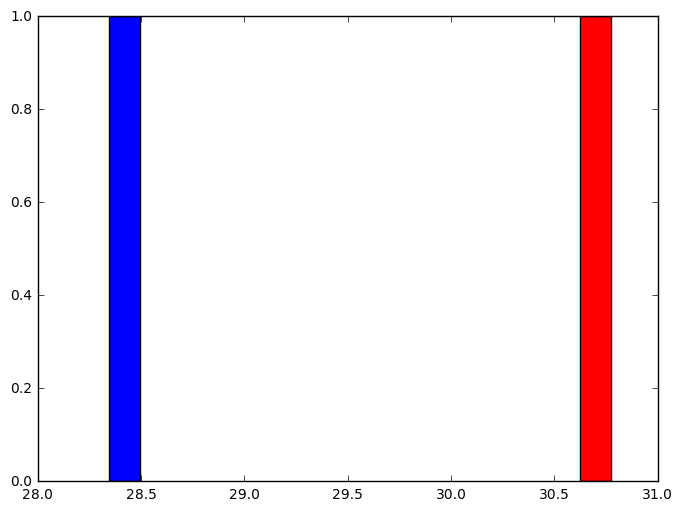

In [55]:
fig, ax = plt.subplots()
width = 0.15
rect1 = ax.bar(data[data['Survived'] == 0]['Age'].mean(), 1, width, color='r')
rect2 = ax.bar(data[data['Survived'] == 1]['Age'].mean(), 1, width, color='b')
plt.show()

### Как отличается средний возраст мужчин / женщин в зависимости от класса обслуживания? Выберите верные утверждения:
#### В среднем мужчины 1-го класса старше 40 лет - Верно
#### В среднем женщины 1-го класса старше 40 лет - Неверно
#### Мужчины всех классов в среднем старше женщин того же класса - Верно
#### В среднем люди в 1 классе старше, чем во 2-ом, а те старше представителей 3-го класса - Верно

In [58]:
data[(data['Pclass'] == 1) & (data['Sex'] == 'male')]['Age'].mean()

41.28138613861386

In [59]:
data[(data['Pclass'] == 1) & (data['Sex'] == 'female')]['Age'].mean()

34.61176470588235

In [61]:
data[(data['Pclass'] == 2) & (data['Sex'] == 'male')]['Age'].mean()

30.74070707070707

In [62]:
data[(data['Pclass'] == 3) & (data['Sex'] == 'male')]['Age'].mean()

26.507588932806325

In [63]:
data[(data['Pclass'] == 2) & (data['Sex'] == 'female')]['Age'].mean()

28.722972972972972

In [64]:
data[(data['Pclass'] == 3) & (data['Sex'] == 'female')]['Age'].mean()

21.75